In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import tensorflow as tf

In [4]:
import mediapipe as mp

In [5]:
import cv2

In [6]:
import os

In [7]:
# Initialize Mediapipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose()

In [8]:
# Define landmarks to extract
landmarks = [
    "NOSE", "LEFT_SHOULDER", "RIGHT_SHOULDER", "RIGHT_ELBOW",
    "LEFT_ELBOW", "RIGHT_WRIST", "LEFT_WRIST", "LEFT_HIP", "RIGHT_HIP"
]

In [9]:
# Define dataset directories
dataset_dirs = {
    "correct": "C:\\Users\\Rocky\\Desktop\\dataset\\barbel curl\\barbel curl correct",
    "incorrect": "C:\\Users\\Rocky\\Desktop\\dataset\\barbel curl\\barbel curl incorrect"
}
categories = {"correct": "C", "incorrect": "L"}

def extract_landmarks(video_path, label, output_data):
    cap = cv2.VideoCapture(video_path)
    
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        
        # Convert frame to RGB
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = pose.process(frame_rgb)
        
        if results.pose_landmarks:
            row = []
            for landmark in landmarks:
                lm = results.pose_landmarks.landmark[getattr(mp_pose.PoseLandmark, landmark)]
                row.extend([lm.x, lm.y, lm.z])
            row.append(label)
            output_data.append(row)
    
    cap.release()

In [10]:
# Prepare data storage
data = []
header = [f"{lm}_{axis}" for lm in landmarks for axis in ["x", "y", "z"]] + ["label"]

In [11]:
# Process videos
for category, label in categories.items():
    folder_path = dataset_dirs[category]
    for video_file in os.listdir(folder_path):
        video_path = os.path.join(folder_path, video_file)
        extract_landmarks(video_path, label, data)

In [12]:
# Save to CSV
df = pd.DataFrame(data, columns=header)
df.to_csv("pose_data.csv", index=False)

print("Pose data extraction complete. Saved as pose_data.csv")

Pose data extraction complete. Saved as pose_data.csv


In [13]:
df.head(5)

,NOSE_x,NOSE_y,NOSE_z,LEFT_SHOULDER_x,LEFT_SHOULDER_y,LEFT_SHOULDER_z,RIGHT_SHOULDER_x,RIGHT_SHOULDER_y,RIGHT_SHOULDER_z,RIGHT_ELBOW_x,...,LEFT_WRIST_x,LEFT_WRIST_y,LEFT_WRIST_z,LEFT_HIP_x,LEFT_HIP_y,LEFT_HIP_z,RIGHT_HIP_x,RIGHT_HIP_y,RIGHT_HIP_z,label
0,0.462351,0.164782,-0.123609,0.492257,0.277292,-0.278439,0.495751,0.273434,0.097337,0.493655,...,0.456587,0.522510,-0.301254,0.500413,0.519186,-0.118165,0.500515,0.515042,0.118187,C
1,0.461219,0.164932,-0.114580,0.486904,0.278109,-0.277368,0.498989,0.274135,0.102823,0.496862,...,0.456758,0.526260,-0.275735,0.499275,0.520893,-0.118174,0.504388,0.515979,0.118193,C
2,0.459519,0.165322,-0.104555,0.486792,0.278391,-0.266112,0.497042,0.274535,0.107656,0.495639,...,0.459964,0.520088,-0.272144,0.497558,0.523163,-0.117418,0.502223,0.519563,0.117412,C
3,0.458880,0.165431,-0.107126,0.486089,0.278825,-0.268223,0.496873,0.274687,0.107563,0.495361,...,0.460992,0.520118,-0.275714,0.497295,0.524679,-0.117569,0.502224,0.521054,0.117551,C
4,0.457120,0.165494,-0.110781,0.485511,0.279727,-0.274603,0.494680,0.275643,0.106146,0.494260,...,0.461308,0.523362,-0.278242,0.495721,0.528560,-0.117773,0.500755,0.524592,0.117746,C


In [15]:
df.shape

(145776, 28)

In [16]:
# Check for null values
null_values = df.isnull().sum()
print("Null Values in Each Column:\n", null_values)

Null Values in Each Column:
 NOSE_x              0
NOSE_y              0
NOSE_z              0
LEFT_SHOULDER_x     0
LEFT_SHOULDER_y     0
LEFT_SHOULDER_z     0
RIGHT_SHOULDER_x    0
RIGHT_SHOULDER_y    0
RIGHT_SHOULDER_z    0
RIGHT_ELBOW_x       0
RIGHT_ELBOW_y       0
RIGHT_ELBOW_z       0
LEFT_ELBOW_x        0
LEFT_ELBOW_y        0
LEFT_ELBOW_z        0
RIGHT_WRIST_x       0
RIGHT_WRIST_y       0
RIGHT_WRIST_z       0
LEFT_WRIST_x        0
LEFT_WRIST_y        0
LEFT_WRIST_z        0
LEFT_HIP_x          0
LEFT_HIP_y          0
LEFT_HIP_z          0
RIGHT_HIP_x         0
RIGHT_HIP_y         0
RIGHT_HIP_z         0
label               0
dtype: int64


In [17]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print("\nNumber of Duplicate Rows:", duplicate_rows)


Number of Duplicate Rows: 2025


In [18]:
# Check dataset balance
class_distribution = df["label"].value_counts()
print("\nClass Distribution:\n", class_distribution)


Class Distribution:
 label
C    87992
L    57784
Name: count, dtype: int64


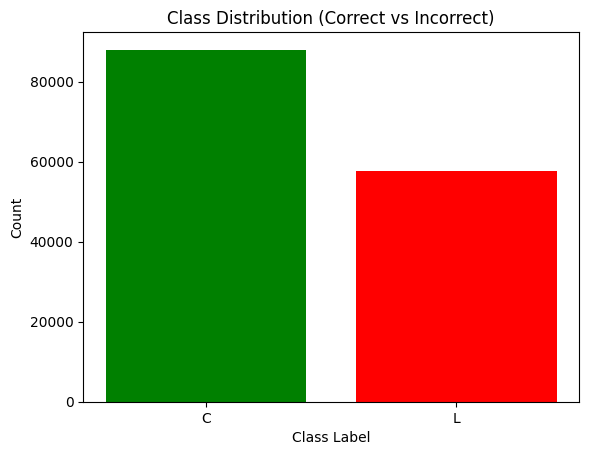

In [19]:
# Visualize dataset balance
import matplotlib.pyplot as plt

plt.bar(class_distribution.index, class_distribution.values, color=['green', 'red'])
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.title("Class Distribution (Correct vs Incorrect)")
plt.show()

In [20]:
# Remove duplicate rows
df_cleaned = df.drop_duplicates()

# Save the cleaned dataset
df_cleaned.to_csv("pose_data_cleaned.csv", index=False)

print(f"Original dataset size: {df.shape[0]} rows")
print(f"Cleaned dataset size: {df_cleaned.shape[0]} rows")
print("Duplicate rows removed. Cleaned dataset saved as 'pose_data_cleaned.csv'.")

Original dataset size: 145776 rows
Cleaned dataset size: 143751 rows
Duplicate rows removed. Cleaned dataset saved as 'pose_data_cleaned.csv'.


In [ ]:
# Visualize dataset balance
import matplotlib.pyplot as plt

plt.bar(class_distribution.index, class_distribution.values, color=['green', 'red'])
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.title("Class Distribution (Correct vs Incorrect)")
plt.show()


Class Distribution:
 label
C    85967
L    57784
Name: count, dtype: int64


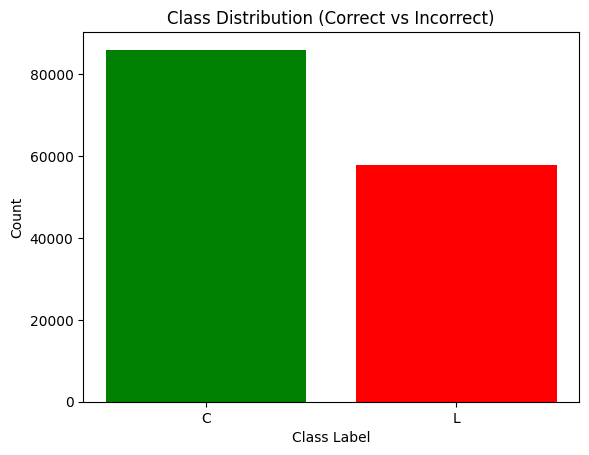

In [21]:
# Load the cleaned dataset
df = pd.read_csv("pose_data_cleaned.csv")

# Check class distribution
class_distribution = df["label"].value_counts()
print("\nClass Distribution:\n", class_distribution)

# Visualize class balance
plt.bar(class_distribution.index, class_distribution.values, color=['green', 'red'])
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.title("Class Distribution (Correct vs Incorrect)")
plt.show()

In [25]:
import pickle

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Load the cleaned dataset
df = pd.read_csv("pose_data_cleaned.csv")

# Convert labels ('C' -> 0, 'L' -> 1)
label_encoder = LabelEncoder()
df["label"] = label_encoder.fit_transform(df["label"])

# Normalize x, y, z values to range [0,1]
scaler = MinMaxScaler(feature_range=(0, 1))  # Change to (-1,1) if needed
feature_columns = df.columns[:-1]  # All columns except the label

df[feature_columns] = scaler.fit_transform(df[feature_columns])




# Save the preprocessed dataset
df.to_csv("pose_data_preprocessed.csv", index=False)

print("Preprocessing complete. Saved as 'pose_data_preprocessed.csv'.")


Preprocessing complete. Saved as 'pose_data_preprocessed.csv'.


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("pose_data_preprocessed.csv")

# Shuffle dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)  # frac=1 ensures full shuffling

# Split into training (80%) and testing (20%)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Save to CSV files
train_df.to_csv("train.csv", index=False)
test_df.to_csv("test.csv", index=False)

print(f"Training set: {len(train_df)} rows saved to train.csv")
print(f"Test set: {len(test_df)} rows saved to test.csv")


Training set: 115000 rows saved to train.csv
Test set: 28751 rows saved to test.csv


In [26]:
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [28]:
train_df = pd.read_csv("train.csv")
print(train_df.columns)

Index(['NOSE_x', 'NOSE_y', 'NOSE_z', 'LEFT_SHOULDER_x', 'LEFT_SHOULDER_y',
       'LEFT_SHOULDER_z', 'RIGHT_SHOULDER_x', 'RIGHT_SHOULDER_y',
       'RIGHT_SHOULDER_z', 'RIGHT_ELBOW_x', 'RIGHT_ELBOW_y', 'RIGHT_ELBOW_z',
       'LEFT_ELBOW_x', 'LEFT_ELBOW_y', 'LEFT_ELBOW_z', 'RIGHT_WRIST_x',
       'RIGHT_WRIST_y', 'RIGHT_WRIST_z', 'LEFT_WRIST_x', 'LEFT_WRIST_y',
       'LEFT_WRIST_z', 'LEFT_HIP_x', 'LEFT_HIP_y', 'LEFT_HIP_z', 'RIGHT_HIP_x',
       'RIGHT_HIP_y', 'RIGHT_HIP_z', 'label'],
      dtype='object')
